In [1]:
import zipfile
from src.data.get_data import extractDataFromWeb

/Users/gkesler/Documents/GitHub/tensorflow-archive/notebooks/data


In [2]:
extractDataFromWeb()

hello world


In [2]:
#! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [3]:
#zip_ref = zipfile.ZipFile("pizza_steak.zip")
#zip_ref.extractall()
#zip_ref.close()

In [4]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'there are {len(dirnames)} and {len(filenames)} images in {dirpath} ')


there are 2 and 0 images in pizza_steak 
there are 2 and 0 images in pizza_steak/test 
there are 0 and 250 images in pizza_steak/test/steak 
there are 0 and 250 images in pizza_steak/test/pizza 
there are 2 and 0 images in pizza_steak/train 
there are 0 and 750 images in pizza_steak/train/steak 
there are 0 and 750 images in pizza_steak/train/pizza 


In [5]:
!ls -la pizza_steak

total 0
drwxr-xr-x  4 gkesler  staff  128 Dec 16 12:33 .
drwxr-xr-x  9 gkesler  staff  288 Dec 16 12:40 ..
drwxr-xr-x  4 gkesler  staff  128 Dec 16 12:33 test
drwxr-xr-x  4 gkesler  staff  128 Dec 16 12:33 train


In [6]:
num_steak_imgaes_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_imgaes_test = len(os.listdir('pizza_steak/test/steak'))
num_steak_imgaes_train, num_steak_imgaes_test

(750, 250)

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array([item.name for item in data_dir.glob('*')])
class_names

array(['steak', 'pizza'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder=target_dir+'/'+target_class
    print(target_folder)

    random_image=random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape: {img.shape}')

    return img


pizza_steak/train/steak
['1632774.jpg']
Image shape: (512, 512, 3)


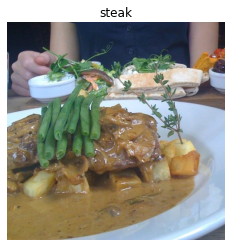

In [9]:
img = view_random_image(
    target_dir='pizza_steak/train',
    target_class='steak')

In [10]:
import tensorflow as tf

tf.constant(img)

2021-12-16 13:58:44.334590: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 13,  17,  28],
        [ 15,  17,  29],
        [ 18,  18,  30],
        ...,
        [ 23,  19,  33],
        [ 21,  19,  33],
        [ 20,  19,  35]],

       [[ 12,  16,  27],
        [ 14,  16,  28],
        [ 16,  16,  28],
        ...,
        [ 23,  19,  33],
        [ 21,  19,  33],
        [ 20,  19,  33]],

       [[ 11,  18,  28],
        [ 13,  17,  28],
        [ 13,  15,  27],
        ...,
        [ 22,  19,  30],
        [ 21,  19,  32],
        [ 20,  19,  33]],

       ...,

       [[150, 125,  69],
        [148, 123,  67],
        [147, 122,  66],
        ...,
        [101, 106, 112],
        [102, 106, 117],
        [102, 106, 117]],

       [[153, 128,  72],
        [153, 128,  72],
        [153, 128,  72],
        ...,
        [106, 111, 117],
        [107, 111, 122],
        [108, 112, 123]],

       [[155, 130,  74],
        [157, 132,  76],
        [158, 133,  77],
        ...,
        [100, 105, 11

In [11]:
img.shape

(512, 512, 3)

In [12]:
img / 255.

array([[[0.05098039, 0.06666667, 0.10980392],
        [0.05882353, 0.06666667, 0.11372549],
        [0.07058824, 0.07058824, 0.11764706],
        ...,
        [0.09019608, 0.0745098 , 0.12941176],
        [0.08235294, 0.0745098 , 0.12941176],
        [0.07843137, 0.0745098 , 0.1372549 ]],

       [[0.04705882, 0.0627451 , 0.10588235],
        [0.05490196, 0.0627451 , 0.10980392],
        [0.0627451 , 0.0627451 , 0.10980392],
        ...,
        [0.09019608, 0.0745098 , 0.12941176],
        [0.08235294, 0.0745098 , 0.12941176],
        [0.07843137, 0.0745098 , 0.12941176]],

       [[0.04313725, 0.07058824, 0.10980392],
        [0.05098039, 0.06666667, 0.10980392],
        [0.05098039, 0.05882353, 0.10588235],
        ...,
        [0.08627451, 0.0745098 , 0.11764706],
        [0.08235294, 0.0745098 , 0.1254902 ],
        [0.07843137, 0.0745098 , 0.12941176]],

       ...,

       [[0.58823529, 0.49019608, 0.27058824],
        [0.58039216, 0.48235294, 0.2627451 ],
        [0.57647059, 0

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen  = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/Users/gkesler/Documents/temp/cnn/pizza_steak/train'
test_dir = '/Users/gkesler/Documents/temp/cnn/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir, 
                                                batch_size=32,
                                                target_size=(224, 224), 
                                                class_mode='binary', 
                                                seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
import tensorflow.keras as keras

model1 = keras.Sequential([ 
    keras.layers.Conv2D(filters=12, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    keras.layers.Conv2D(filters=12, kernel_size=3,  activation='relu'),
    keras.layers.MaxPool2D(pool_size=3, padding='valid'),
    keras.layers.Conv2D(filters=12, kernel_size=3,  activation='relu'),
    keras.layers.Conv2D(filters=12, kernel_size=3,  activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

history1 = model1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.5933 - accuracy: 0.7053 - val_loss: 0.4673 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 59s 1s/step - loss: 0.4751 - accuracy: 0.7840 - val_loss: 0.4038 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4406 - accuracy: 0.8087 - val_loss: 0.3620 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.4041 - accuracy: 0.8207 - val_loss: 0.3770 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.3772 - accuracy: 0.8427 - val_loss: 0.5709 - val_accuracy: 0.7120


In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [19]:
tf.random.set_seed(42)

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history2 = model2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 13s 263ms/step - loss: 0.6936 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 265ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


In [22]:
tf.random.set_seed(42)

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history3 = model3.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/20
47/47 [==============================] - 18s 356ms/step - loss: 1.3377 - accuracy: 0.6067 - val_loss: 0.8894 - val_accuracy: 0.6800
Epoch 2/20
47/47 [==============================] - 16s 340ms/step - loss: 0.6207 - accuracy: 0.7300 - val_loss: 0.8713 - val_accuracy: 0.5960
Epoch 3/20
47/47 [==============================] - 14s 295ms/step - loss: 0.5765 - accuracy: 0.7500 - val_loss: 0.5922 - val_accuracy: 0.6980
Epoch 4/20
47/47 [==============================] - 14s 287ms/step - loss: 0.4919 - accuracy: 0.7793 - val_loss: 0.4430 - val_accuracy: 0.7880
Epoch 5/20
47/47 [==============================] - 13s 272ms/step - loss: 0.4610 - accuracy: 0.7987 - val_loss: 0.4190 - val_accuracy: 0.8080
Epoch 6/20
47/47 [==============================] - 14s 302ms/step - loss: 0.4398 - accuracy: 0.8060 - val_loss: 0.4331 - val_accuracy: 0.7880
Epoch 7/20
47/47 [==============================] - 15s 327ms/step - loss: 0.5141 - accuracy: 0.7660 - val_loss: 0.6016 - val_accuracy: 0.7020

In [ ]:
model3.summary()

pizza_steak/train/steak
['2088030.jpg']
Image shape: (512, 512, 3)
pizza_steak/train/pizza
['3148119.jpg']
Image shape: (512, 512, 3)


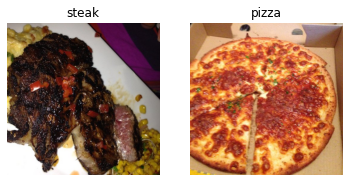

In [24]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1,2,2)
steak_img = view_random_image('pizza_steak/train', 'pizza')

In [236]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [237]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=(1/255.))
test_datagen = ImageDataGenerator(rescale=(1/255.))

In [238]:
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary', batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [75]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [76]:
len(train_data)

47

(<matplotlib.image.AxesImage at 0x148de03d0>, 0.0)

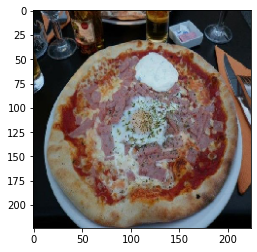

In [77]:
plt.imshow(images[0]), labels[0]

In [239]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
tf.random.set_seed(42)

model4 = Sequential([ 
    Conv2D(filters=10, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=3, padding='valid'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model4.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy'])

history4 = model4.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 81s 2s/step - loss: 0.5931 - accuracy: 0.6633 - val_loss: 0.3803 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.4345 - accuracy: 0.7980 - val_loss: 0.3646 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: 0.4154 - accuracy: 0.8140 - val_loss: 0.3799 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 109s 2s/step - loss: 0.3905 - accuracy: 0.8273 - val_loss: 0.3387 - val_accuracy: 0.8560
Epoch 5/5
19/47 [===========>..................] - ETA: 55s - loss: 0.3550 - accuracy: 0.8477

KeyboardInterrupt: 

In [ ]:
model = Sequential([ 
    Conv2D(filters=10, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=3, padding='valid'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy'])

history4 = model.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

<AxesSubplot:>

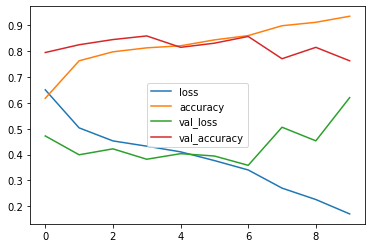

In [ ]:
import pandas as pd
pd.DataFrame(history4.history).plot()

In [ ]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs=range(len(history.history['loss']))



    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='trainin_loss')
    plt.plot(epochs, val_loss, label='test_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend();
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='trainin_accuracy')
    plt.plot(epochs, val_accuracy, label='test_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend();



In [84]:
model4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 conv2d_65 (Conv2D)          (None, 222, 222, 8)       584       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 72, 72, 8)         584       
                                                                 
 conv2d_67 (Conv2D)          (None, 70, 70, 8)         584       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 35, 35, 8)        0         
 g2D)                                                

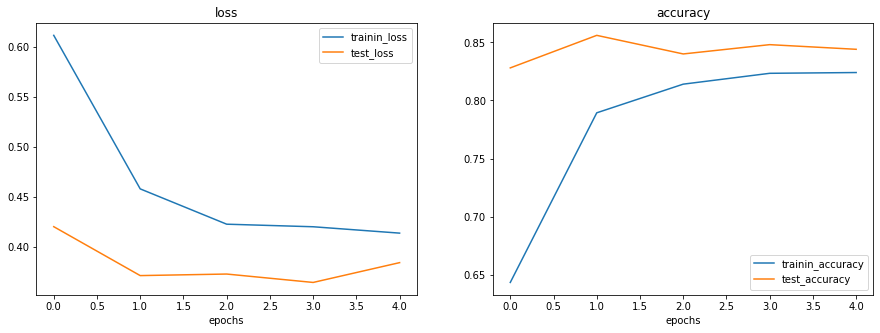

In [85]:
plot_loss_curve(history4)

In [80]:
tf.random.set_seed(42)

model5 = Sequential([ 
    Conv2D(filters=10, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model5.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy'])

history5 = model5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 695ms/step - loss: 0.6761 - accuracy: 0.6360 - val_loss: 0.6255 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 34s 733ms/step - loss: 0.5615 - accuracy: 0.7453 - val_loss: 0.4512 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 31s 659ms/step - loss: 0.4870 - accuracy: 0.7787 - val_loss: 0.3951 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 31s 665ms/step - loss: 0.4561 - accuracy: 0.8027 - val_loss: 0.4077 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 38s 808ms/step - loss: 0.4346 - accuracy: 0.8053 - val_loss: 0.3865 - val_accuracy: 0.8280


In [81]:
model5.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 72, 72, 10)        910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 22, 22, 10)        910       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 7, 7, 10)       

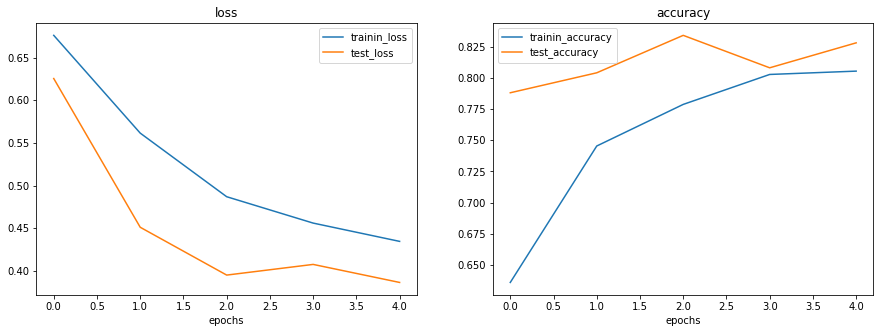

In [82]:
plot_loss_curve(history5)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [134]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


train_datagen = ImageDataGenerator(
    rescale=(1./255)
)


test_datagen = ImageDataGenerator(
    rescale=1./255
)



In [135]:
train_data_aug = train_datagen_augmented.flow_from_directory(
    'pizza_steak/train', 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary')

train_data = train_datagen.flow_from_directory(
    'pizza_steak/train', 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary')

test_data = test_datagen.flow_from_directory(
    'pizza_steak/test', 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [136]:
images_aug, labels_aug = train_data_aug.next()
images, labels = train_data.next()

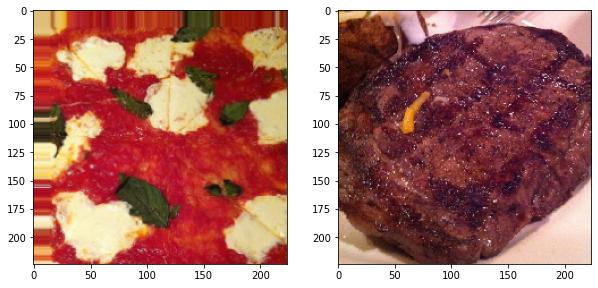

In [137]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
i =random.randint(0,31)

plt.imshow(images_aug[i])

plt.subplot(1, 2, 2)
plt.imshow(images[i])

In [141]:
tf.random.set_seed(42)

model6 = Sequential([ 
    Conv2D(filters=20, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=20, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=20, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=20, kernel_size=3,  activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model6.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy'])

history6 = model6.fit(train_data_aug, 
                        epochs=20,
                        steps_per_epoch=len(train_data_aug), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 78s 2s/step - loss: 0.6429 - accuracy: 0.6247 - val_loss: 0.5251 - val_accuracy: 0.7560
Epoch 2/20
47/47 [==============================] - 97s 2s/step - loss: 0.5092 - accuracy: 0.7560 - val_loss: 0.3990 - val_accuracy: 0.8240
Epoch 3/20
47/47 [==============================] - 78s 2s/step - loss: 0.4585 - accuracy: 0.7920 - val_loss: 0.3495 - val_accuracy: 0.8620
Epoch 4/20
47/47 [==============================] - 84s 2s/step - loss: 0.4381 - accuracy: 0.8120 - val_loss: 0.3358 - val_accuracy: 0.8660
Epoch 5/20
47/47 [==============================] - 67s 1s/step - loss: 0.4340 - accuracy: 0.8107 - val_loss: 0.3373 - val_accuracy: 0.8680
Epoch 6/20
47/47 [==============================] - 69s 1s/step - loss: 0.4247 - accuracy: 0.8120 - val_loss: 0.3353 - val_accuracy: 0.8680
Epoch 7/20
47/47 [==============================] - 66s 1s/step - loss: 0.4000 - accuracy: 0.8220 - val_loss: 0.3288 - val_accuracy: 0.8560
Epoch 8/20
47/47 [==

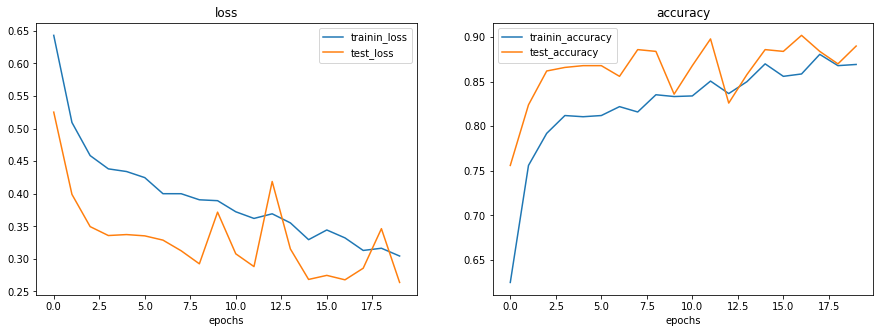

In [142]:
plot_loss_curve(history6)

In [ ]:
steak = mpimg.imread('steak.jpg')
pizza = mpimg.imread('pizza.jpg')

In [144]:

def prep_image(filename, image_shape=224):
    image = tf.io.read_file(filename)

    image = tf.image.decode_image(image)
    image = tf.image.resize(images=image, size=[image_shape, image_shape])
    image = image / 255.
    return image




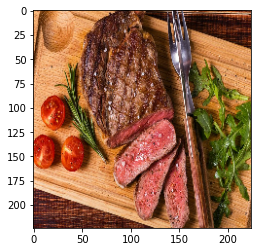

In [145]:
steak = prep_image('steak.jpg')
plt.imshow(steak)

In [147]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 224, 224, 3])

In [148]:
model6.predict(expanded_steak)

array([[0.98251843]], dtype=float32)

In [149]:
expanded_pizza = tf.expand_dims(prep_image('pizza.jpg'), axis=0)

In [150]:
model6.predict(expanded_pizza)

array([[0.00623214]], dtype=float32)

In [151]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-12-16 18:39:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.187.112, 172.217.169.176, 216.58.206.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.187.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   648KB/s    in 13m 14s 

2021-12-16 18:52:59 (639 KB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [210]:
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_all_data.zip' mode='r'>>

In [211]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'there are {len(dirnames)} and {len(filenames)} images in {dirpath} ')

there are 2 and 0 images in 10_food_classes_all_data 
there are 10 and 0 images in 10_food_classes_all_data/test 
there are 0 and 250 images in 10_food_classes_all_data/test/ice_cream 
there are 0 and 250 images in 10_food_classes_all_data/test/chicken_curry 
there are 0 and 250 images in 10_food_classes_all_data/test/steak 
there are 0 and 250 images in 10_food_classes_all_data/test/sushi 
there are 0 and 250 images in 10_food_classes_all_data/test/chicken_wings 
there are 0 and 250 images in 10_food_classes_all_data/test/grilled_salmon 
there are 0 and 250 images in 10_food_classes_all_data/test/hamburger 
there are 0 and 250 images in 10_food_classes_all_data/test/pizza 
there are 0 and 250 images in 10_food_classes_all_data/test/ramen 
there are 0 and 250 images in 10_food_classes_all_data/test/fried_rice 
there are 10 and 0 images in 10_food_classes_all_data/train 
there are 0 and 750 images in 10_food_classes_all_data/train/ice_cream 
there are 0 and 750 images in 10_food_classes

In [212]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [213]:
from pathlib import Path
import numpy as np

data_dir = Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


10_food_classes_all_data/train/fried_rice
['2066494.jpg']
Image shape: (512, 512, 3)


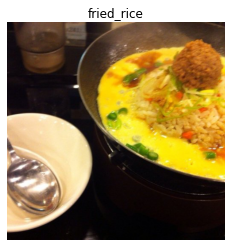

In [215]:
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)
)

In [169]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [232]:
train_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(
    rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(test_dir,
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32
)
train_data

Found 7499 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [233]:
images_train, labels_train = next(train_data)
images_train.shape, labels_train.shape

((32, 128, 128, 3), (32, 10))

In [234]:
images_test, labels_test = next(test_data)
images_test.shape, labels_test.shape

((32, 128, 128, 3), (32, 10))

In [1]:
from tensorflow.keras.losses import CategoricalCrossentropy
tf.random.set_seed(42)

model7 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(64, 64, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(10, activation='softmax')
])

model7.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history_7 = model7.fit(train_data, # now 10 different classes 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

NameError: name 'tf' is not defined

In [227]:
model7.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 22, 22, 10)        280       
                                                                 
 conv2d_109 (Conv2D)         (None, 20, 20, 10)        910       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 10, 10, 10)       0         
 g2D)                                                            
                                                                 
 flatten_40 (Flatten)        (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 10)                10010     
                                                                 
Total params: 11,200
Trainable params: 11,200
Non-trainable params: 0
_________________________________________________

In [199]:
len(test_data), len(train_data)

(79, 235)

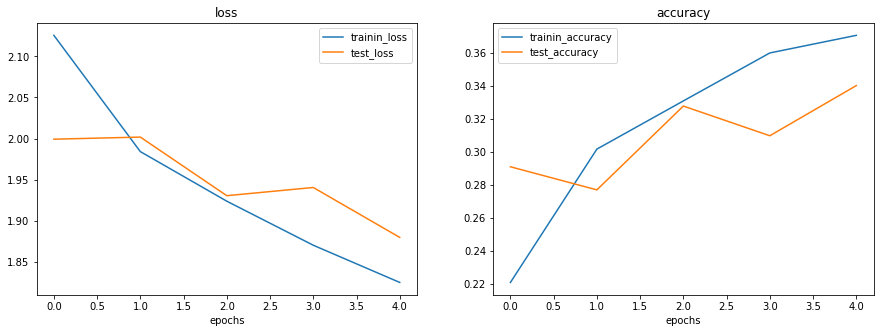

In [224]:
plot_loss_curve(history_7)